## Retrieve Frequency Counts for Users

In [8]:
import os, json
from os import path
import pandas as pd
import numpy as np
import glob
pd.set_option('display.max_columns', None)

#FJERN POLITIFACT 14548 - 1054731691875618829 ELLER KJØR MED ERRORS=SURROGATEESCAPE 
#GJENTA FOR REAL

fakeUsers = {}
realUsers = {}


for i in range(2):
    if i == 0:
        authenticity = 'fake'
    else:
        authenticity = 'real'
    rootdir = 'C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/'+authenticity

    for subdir, dirs, articles in os.walk(rootdir):
        for article in dirs:
            #print(subdir)
            temp = pd.DataFrame()
            #path_to_json = 'C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact11773/tweets' 
            path_to_json = 'C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/' + authenticity + '/'+ article + '/tweets' 
            print(path_to_json)
            json_pattern = os.path.join(path_to_json,'*.json')
            file_list = glob.glob(json_pattern)

            for file in file_list:
                #print(file)
                try:
                    data = pd.read_json(open(file, "r", encoding="utf8", errors="surrogateescape"), lines=True)
                    temp = temp.append(data, ignore_index = True) 
                    break
                except ValueError:
                    print("ValueError")
        #print(temp["user"][0]['id'])
        #print(temp['retweets'][13][0]['user']['id'])


        #FINN UNIKE VERDIER UNDER USER I TEMP: 
            users = list() #LAG LISTE HELLER
            if "user" in temp.keys():
                for dic in temp["user"]:
                    if dic['id'] not in users:
                        users.append(dic['id'])
        
            temp = pd.DataFrame()        
        #path_to_json = 'C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact11773/retweets' 
            path_to_json = 'C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/'+authenticity+'/'+article+'/retweets' 
            print(path_to_json)
            json_pattern = os.path.join(path_to_json,'*.json')
            file_list = glob.glob(json_pattern)

            for file in file_list:
            #print(file)
                try:
                    data = pd.read_json(open(file, "r", encoding="utf8", errors="surrogateescape"), lines=True)
                    temp = temp.append(data, ignore_index = True) 
                    break
                except ValueError:
                    print("ValueError")
        #print(temp["user"][0]['id'])
        #print(temp['retweets'][13][0]['user']['id'])



        #FINN UNIKE VERDIER UNDER USER I TEMP: 
        #users = list() #LAG LISTE HELLER
            if "retweets" in temp.keys():
                for lst in temp["retweets"]:
                    if len(lst)>0:
                        #print(lst)
                        if lst[0]['user']['id'] not in users:
                            users.append(lst[0]['user']['id'])

            if i == 0:
            #Initialize dict
                for user in users:
                    if user not in fakeUsers.keys():
                        fakeUsers[user] = 0
            #increment usercounts
                for fakeUser in fakeUsers:
                    fakeUsers[fakeUser] = fakeUsers[fakeUser]+1
                #print(fakeUsers)
            elif i == 1:
                #Initialize dict
                for user in users:
                    if user not in realUsers.keys():
                        realUsers[user] = 0
                #increment usercounts
                for realUser in realUsers:
                    realUsers[realUser] = realUsers[realUser]+1
                #print(realUsers)

    
#for articles..
#fakeArticles.append('politifact11773') #legg til alle articles for plot

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact11773/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact11773/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact13038/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact13038/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact13467/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact13467/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact13468/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact13468/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact13475/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/polit

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact13766/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact13771/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact13771/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact13773/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact13773/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact13775/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact13775/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact13784/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact13784/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/pol

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14008/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14021/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14021/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14026/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14026/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14040/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14040/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14043/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14043/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/pol

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14264/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14264/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14265/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14265/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14270/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14270/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14273/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14273/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14278/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/polit

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14454/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14469/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14469/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14471/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14471/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14472/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14472/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14475/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14475/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/pol

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14668/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14668/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14678/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14678/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14693/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14693/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14694/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14694/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14698/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/polit

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14841/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14841/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14855/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14855/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14856/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14856/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14859/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14859/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact14860/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/polit

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15031/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15037/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15037/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15046/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15046/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15048/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15048/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15049/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15049/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/pol

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15251/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15256/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15256/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15262/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15262/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15263/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15263/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15266/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15266/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/pol

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15401/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15401/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15402/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15402/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15404/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15404/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15409/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15409/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15416/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/polit

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15599/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15604/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15604/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15606/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15606/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15616/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15616/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15623/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact15623/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/pol

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_dat

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_d

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_d

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_dat

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_dat

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_d

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_dat

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_dat

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_dat

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact1027/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact1027/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact10276/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact10276/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact1028/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact1028/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact10332/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact10332/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact10348/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifac

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact11399/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact114/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact114/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact1140/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact1140/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact11416/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact11416/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact1143/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact1143/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact1

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact1213/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact12148/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact12148/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact1216/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact1216/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact12294/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact12294/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact12411/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact12411/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politi

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact13226/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact13229/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact13229/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact13244/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact13244/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact1325/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact1325/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact13260/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact13260/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/polit

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact14511/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact1454/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact1454/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact1465/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact1465/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact1467/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact1467/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact14731/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact14731/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifac

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact195/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact195/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact20/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact20/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact200/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact200/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact201/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact201/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact2013/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact2013/retweets


C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact2592/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact2592/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact2594/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact2594/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact261/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact261/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact2624/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact2624/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact263/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact263/ret

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact341/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact3428/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact3428/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact343/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact343/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact3455/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact3455/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact3468/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact3468/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact348/t

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact421/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact423/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact423/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact426/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact426/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact4275/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact4275/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact429/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact429/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact4291/twee

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact513/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact514/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact514/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact516/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact516/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact52/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact52/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact5237/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact5237/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact527/tweets


C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact620/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact621/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact621/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact6234/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact6234/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact624/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact624/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact6267/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact6267/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact627/twe

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact6932/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact6932/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact6939/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact6939/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact695/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact695/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact6998/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact6998/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact7/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact7/retweet

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact8989/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact8995/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact8995/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact9033/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact9033/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact906/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact906/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact910/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact910/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/politifact9107/t

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_d

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_d

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_d

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_d

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_d

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_dat

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_d

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_d

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_d

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_dat

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_d

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_dat

C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/tweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/tweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/real/retweets/retweets
C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_d

## Plot tweetcount per user and label real/fake

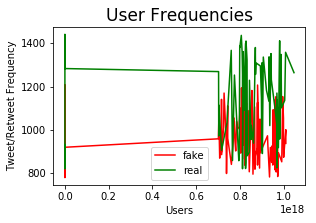

In [122]:
import matplotlib.pylab as plt

lists = sorted(fakeUsers.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.15, left=0.2)

ax.plot(x, y, 'r', label='fake')

lists = sorted(realUsers.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

ax.plot(x, y, 'g', label='real')

ax.set_xlabel('Users')
ax.set_ylabel('Tweet/Retweet Frequency')
ax.legend()
plt.title("User Frequencies", fontsize=17)
plt.show()

## Histogram Plot for Users/Tweets with Labels

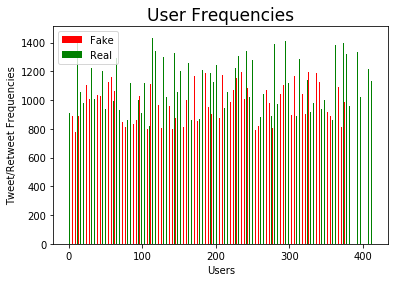

In [128]:
lists = sorted(fakeUsers.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

lists2 = sorted(realUsers.items()) # sorted by key, return a list of tuples

x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples

ax = plt.subplot(111)
ax.bar(np.arange(len(x)), y, width=0.2, color='r', align='center')
ax.bar(np.arange(len(x2))-0.2, y2, width=0.2, color='g', align='center')
ax.legend(('Fake','Real'))
ax.set_xlabel('Users')
ax.set_ylabel('Tweet/Retweet Frequencies')
plt.title("User Frequencies", fontsize=17)
plt.show()

## Kernel Density Function (KDE) Histogram for Users/Tweets with Labels

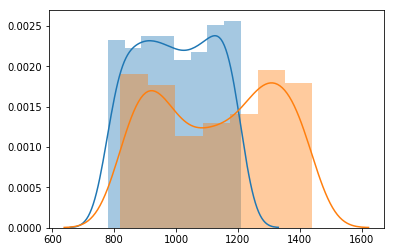

In [50]:
import seaborn as sns
import matplotlib.pylab as plt

lists = sorted(fakeUsers.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

sns.distplot(y)

lists = sorted(realUsers.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

sns.distplot(y)